<a href="https://colab.research.google.com/github/codegitfirst/ML-workshop/blob/main/storke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn matplotlib seaborn numpy pandas

In [ ]:
import numpy
import pandas

In [11]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
100% 67.4k/67.4k [00:00<00:00, 469kB/s]
100% 67.4k/67.4k [00:00<00:00, 468kB/s]


In [12]:
!unzip \*.zip && rm *.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [15]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [17]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
df.duplicated().sum()

0

In [19]:
df.drop(['id'], axis = 1, inplace = True)

In [20]:
df.dropna(axis = 0, inplace = True)

In [21]:
df.dropna(axis = 0, inplace = True)

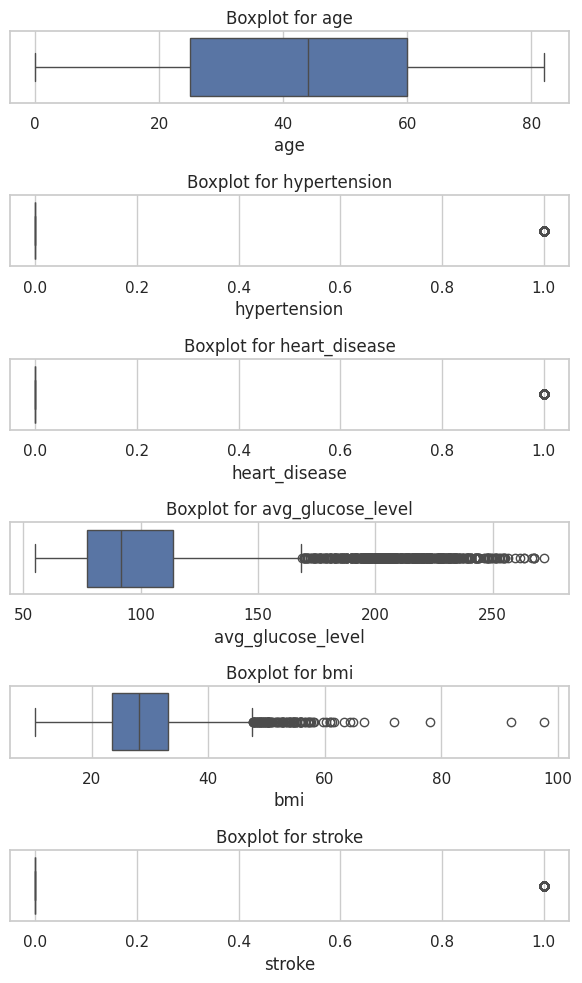

In [22]:
num_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(6, 10))

sns.set(style="whitegrid")

for i, column in enumerate(num_columns):
    plt.subplot(len(num_columns), 1, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

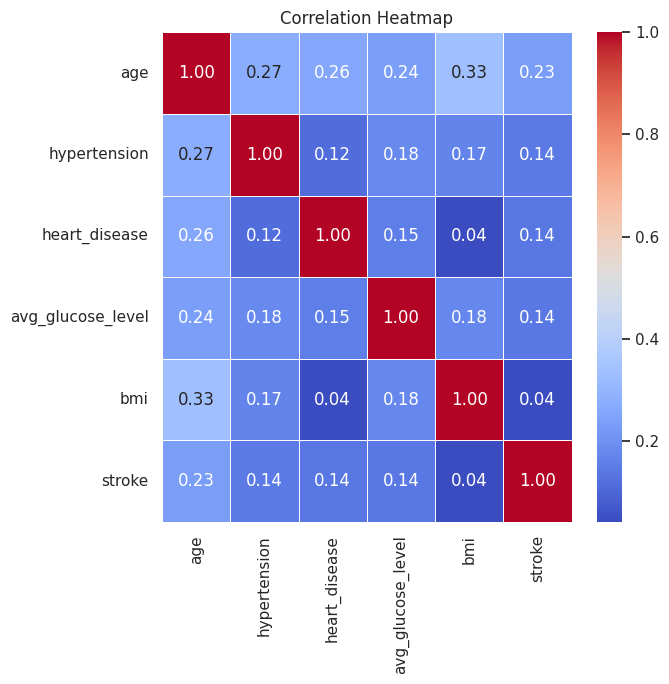

In [24]:
# Select only the numerical columns before calculating the correlation
numerical_df = df.select_dtypes(include=['number'])

corr = numerical_df.corr()

plt.figure(figsize=(7, 7))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')

plt.tight_layout()

plt.show()

In [25]:
df['hypertension'].replace({0: 'have hypertension', 1: 'does not have hypertension'}, inplace=True)
df['heart_disease'].replace({0: 'have heart disease', 1: 'does not have heart disease'}, inplace=True)

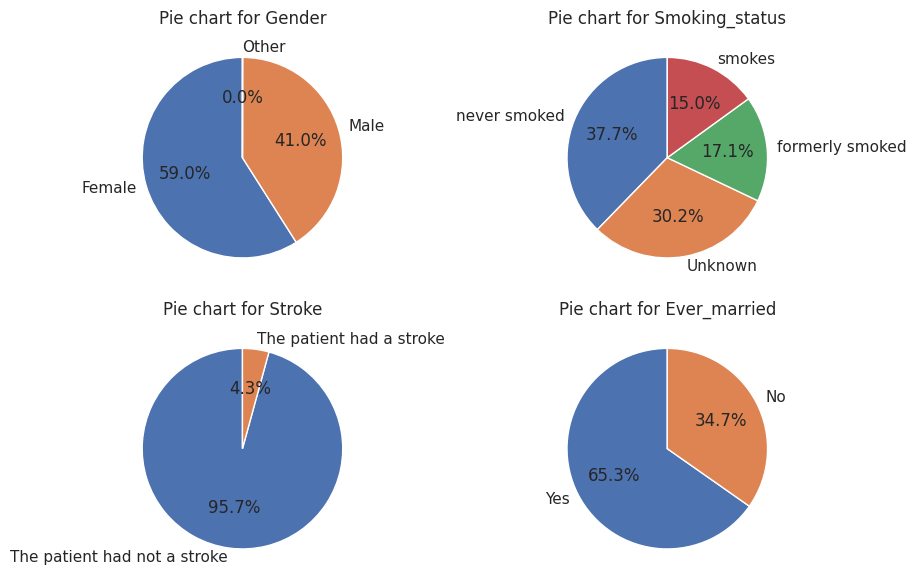

In [26]:
df['stroke'].replace({0: 'The patient had not a stroke', 1: 'The patient had a stroke'}, inplace=True)

categorical_vars =  ['gender','smoking_status','stroke', 'ever_married']

num_vars = len(categorical_vars)

num_cols = 2

num_rows = (num_vars + 1) // 2  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 6))

axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    var_counts = df[var].value_counts()

    axes[i].pie(var_counts, labels=var_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Pie chart for {var.capitalize()}')

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

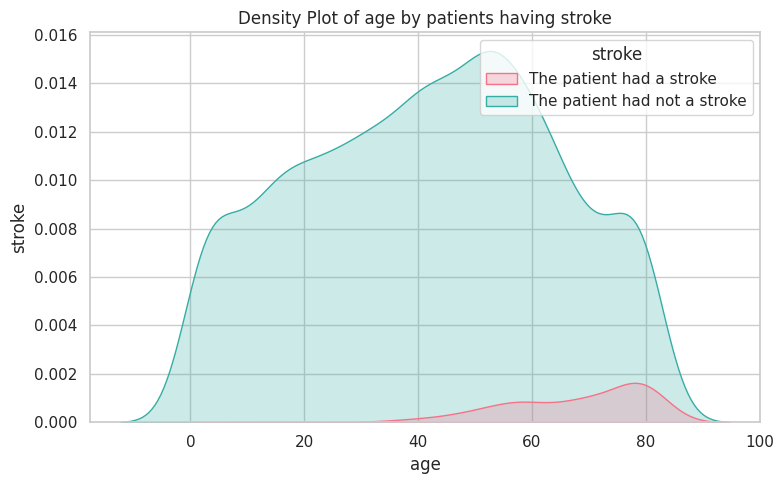

In [27]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, palette='husl')

plt.title('Density Plot of age by patients having stroke')
plt.xlabel('age')
plt.ylabel('stroke')

plt.tight_layout()
plt.show()

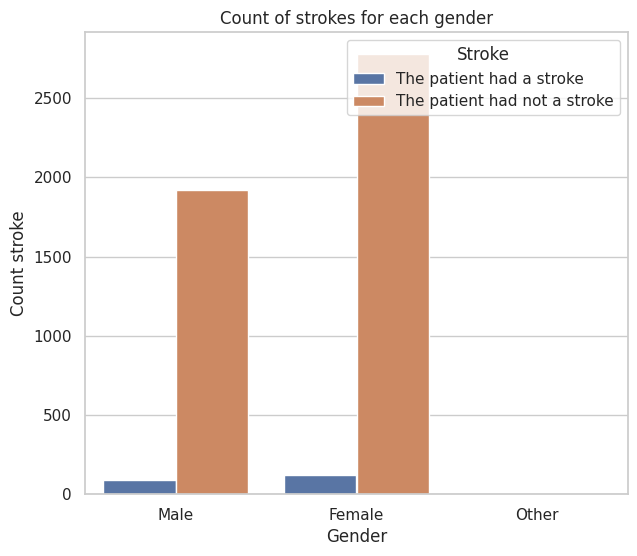

In [28]:
plt.figure(figsize=(7, 6))
sns.countplot(data=df, x='gender', hue='stroke')

plt.title('Count of strokes for each gender')
plt.xlabel('Gender')
plt.ylabel('Count stroke')

plt.legend(title='Stroke')
plt.show()

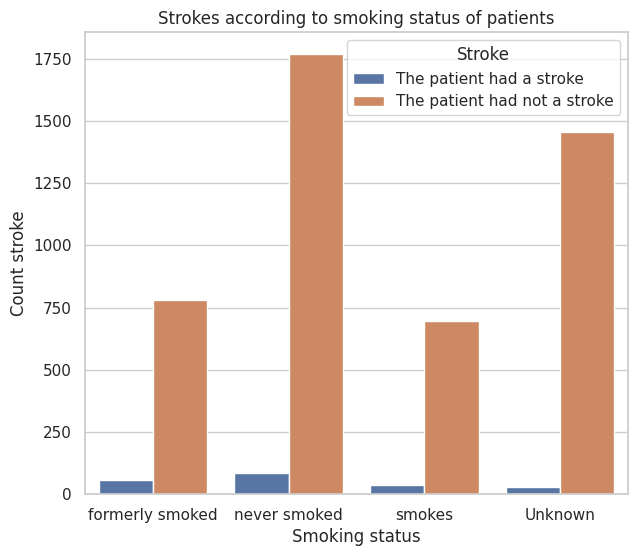

In [29]:
plt.figure(figsize=(7, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke')

plt.title('Strokes according to smoking status of patients')
plt.xlabel('Smoking status')
plt.ylabel('Count stroke')

plt.legend(title='Stroke')
plt.show()

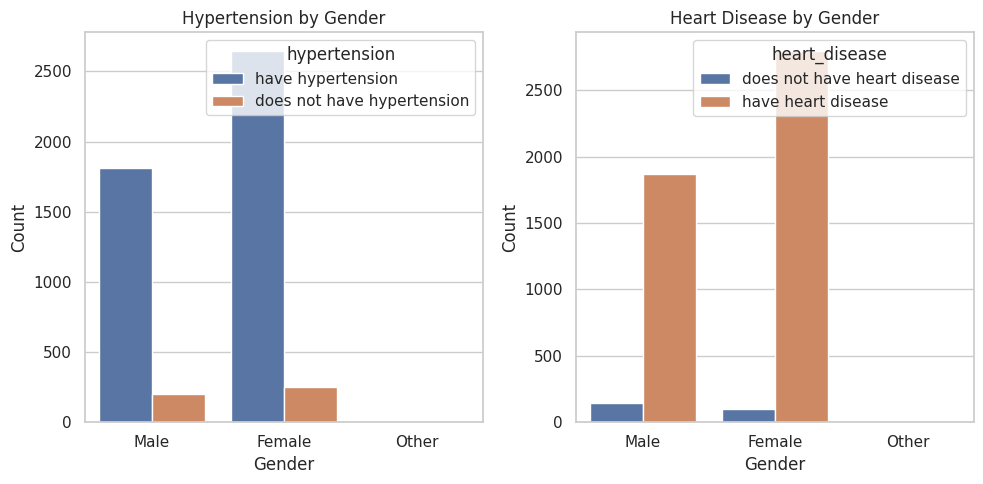

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar plot
sns.countplot(data=df, x='gender', hue='hypertension', ax=axes[0])
axes[0].set_title('Hypertension by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot the second bar plot
sns.countplot(data=df, x='gender', hue='heart_disease', ax=axes[1])
axes[1].set_title('Heart Disease by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

<ipython-input-31-7040564468bb>:3: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.histplot(data=df, x="Residence_type", hue="stroke", bins=20, palette= palette)


Text(0, 0.5, 'Count')

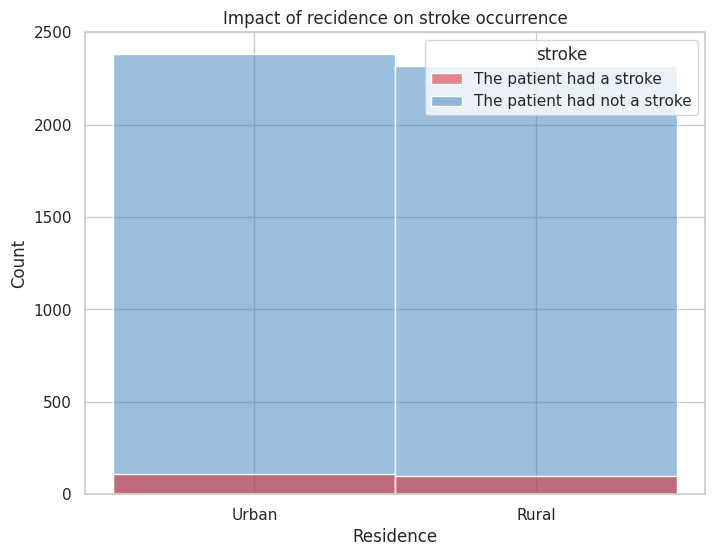

In [31]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette("Set1")
sns.histplot(data=df, x="Residence_type", hue="stroke", bins=20, palette= palette)

plt.title('Impact of recidence on stroke occurrence')
plt.xlabel('Residence')
plt.ylabel('Count')

In [32]:
label_encoder = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = label_encoder.fit_transform(df[col])

In [33]:
x = df.drop(['stroke'], axis = 1)

In [34]:
y = df['stroke']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3927, 10)
(982, 10)
(3927,)
(982,)


In [37]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
rs = RandomizedSearchCV(
    estimator = SVC(gamma='auto'),
    param_distributions={
        'C': [1, 10, 20],
        'kernel': ['rbf', 'linear']
    },
    cv=5,
    return_train_score=False,
    n_iter=4
)

rs.fit(x_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=4,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']})

In [39]:
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.956200
1,1,linear,0.960275
2,10,linear,0.960275
3,20,linear,0.960275


In [40]:
svm_model = svm.SVC(C=20, kernel= 'linear',)
svm_model.fit(x_train, y_train)

SVC(C=20, kernel='linear')

In [41]:
y_pred_test = svm_model.predict(x_test_scaled)

svm_accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {round(svm_accuracy_test * 100,2)}%")

y_pred_train = svm_model.predict(x_train_scaled)

svm_accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {round(svm_accuracy_train * 100,2)}%")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Test Accuracy: 94.6%
Train Accuracy: 96.03%


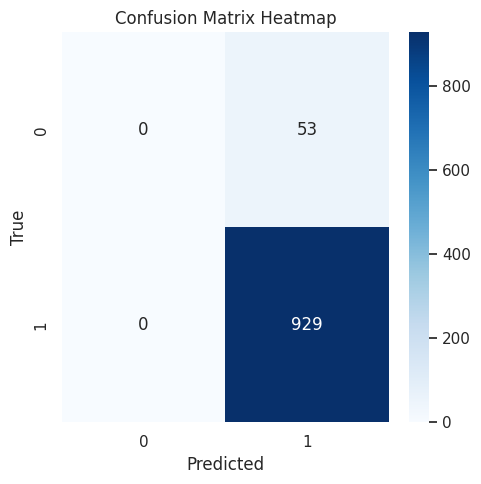

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')

plt.tight_layout()
plt.show()